# Лабораторна робота №1
1)	Ми використовуватимемо дані про позики за 2007-2010 роки.
	Навчити 4 класифікатора, щоб передбачити поле "credit.policy" з набору даних "loan_data.csv":
-	неглибоке дерево розв’язків;
-	глибоке дерево розв’язків;
-	випадковий ліс на неглибоких деревах;
-	випадковий ліс на глибоких деревах;

2)	Розрахуйте наступні метрики, щоб перевірити якість ваших моделей:  
-	частка правильних відповідей (accuracy);
-	точність;
-	повнота;
-   F1-score ;
-	log-loss. 

3)	Побудуйте precision-recall і ROC-криві для ваших моделей.   

4)	Навчіть класифікатор, який уникає помилок другого роду і розрахуйте для нього метрики якості.     


Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('C:/Users/Kate/Desktop/Data Analysis/Datasets/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [26]:
df.shape()

TypeError: 'tuple' object is not callable

<AxesSubplot:>

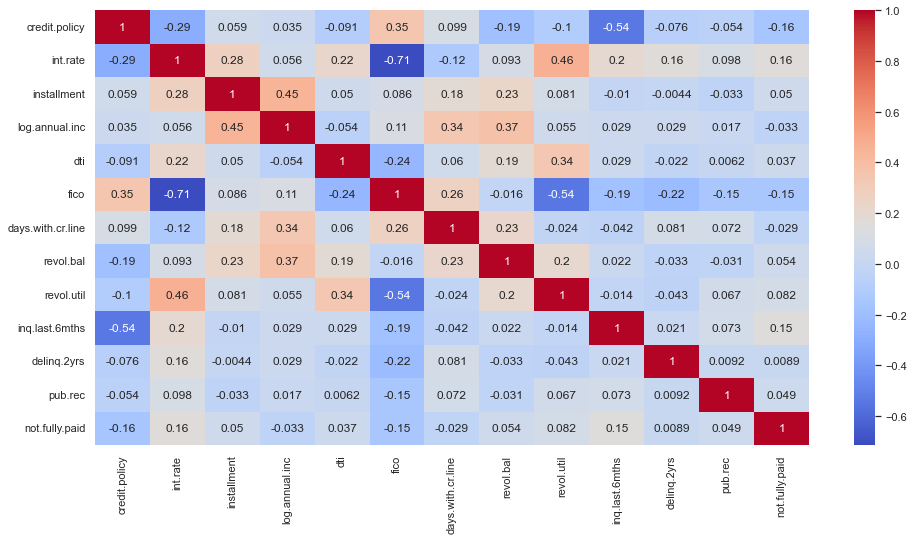

In [4]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap='coolwarm')

In [5]:
X = df['fico']
y = df['credit.policy'] 

y = y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

## Decision tree

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=44)

clf = DecisionTreeClassifier(max_depth = 3,  #or max_leaf_nodes=2
                             random_state = 0)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
# Predict for 1 observation
#clf.predict(X_test.iloc[0].values.reshape(1, -1))
clf.predict(X_test[[0]])

# Predict for multiple observations
clf.predict(X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
#точність класифікатора дерева рішень на тестовому наборі:
print('Accuracy of Desicion Tree classifier on test set:\
{:.2f}'.format(clf.score(X_test, Y_test)))
print('Precision of Desicion Tree classifier on test set: \
{:.2f}'.format(metrics.precision_score(Y_test, clf.predict(X_test))))
print('Recall of Desicion Tree classifier on test set: \
{:.2f}'.format(metrics.recall_score(Y_test, clf.predict(X_test))))

Accuracy of Desicion Tree classifier on test set:0.86
Precision of Desicion Tree classifier on test set: 0.85
Recall of Desicion Tree classifier on test set: 1.00


In [24]:
Accuracy = clf.score(X_test, Y_test)
Precision = metrics.precision_score(Y_test, clf.predict(X_test))
Recall = metrics.recall_score(Y_test, clf.predict(X_test))

F1 = 2*(Precision*Recall)/(Precision+Recall)
print(Accuracy)
print(Precision)
print(Recall)
print(F1)

0.8622129436325678
0.8544548976203652
0.9993527508090615
0.9212410501193316


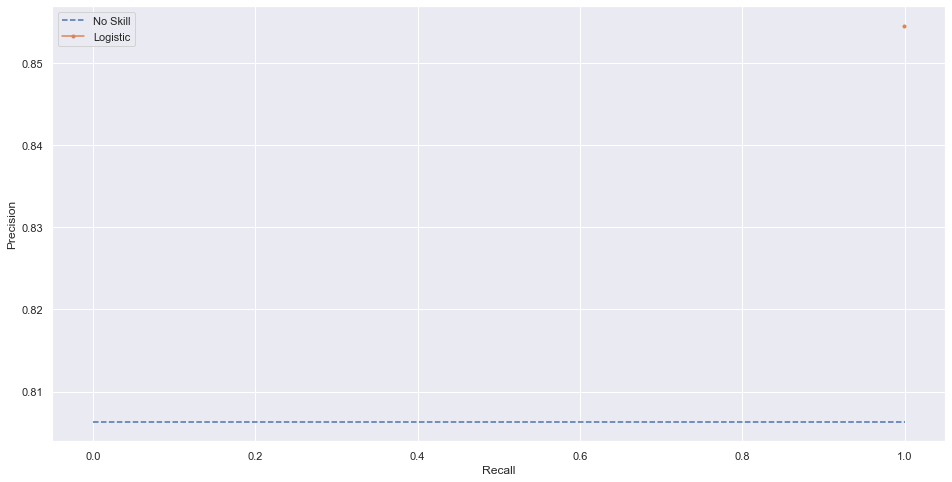

In [10]:
from matplotlib import pyplot 
# plot the precision-recall curves

no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(Recall, Precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## Random Forest

In [25]:
forest_model = RandomForestRegressor(n_estimators=50, max_features='auto', random_state=0)
forest_model.fit(X_train, Y_train)

forest_model.predict(X_test)

#score = forest_model.score(X_test, Y_test)
#print(score)

#точність класифікатора випадкового дерева на тестовому наборі:


<ipython-input-25-767690cff491>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, Y_train)


array([0.78575592, 0.86883652, 0.82930718, ..., 0.98732384, 0.97396589,
       0.97741433])

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression() #any features??
log_model.fit(X_train,Y_train)

log_model.predict(X_test)
score = log_model.score(X_test, Y_test)
print(score)

0.8475991649269311


C:\Users\Kate\anaconda3\envs\main_acad_ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
#точність класифікатора логістичної регресії на тестовому наборі:
print('Accuracy of logistic regression classifier on test set:\
{:.2f}'.format(log_model.score(X_test, Y_test)))
print('Precision of logistic regression classifier on test set: \
{:.2f}'.format(metrics.precision_score(Y_test, log_model.predict(X_test))))
print('Recall of logistic regression classifier on test set: \
{:.2f}'.format(metrics.recall_score(Y_test, log_model.predict(X_test))))

Accuracy of logistic regression classifier on test set:0.85
Precision of logistic regression classifier on test set: 0.84
Recall of logistic regression classifier on test set: 1.00


In [14]:
Accuracy = log_model.score(X_test, Y_test)
Precision = metrics.precision_score(Y_test, log_model.predict(X_test))
Recall = metrics.recall_score(Y_test, log_model.predict(X_test))

F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.9136094674556212

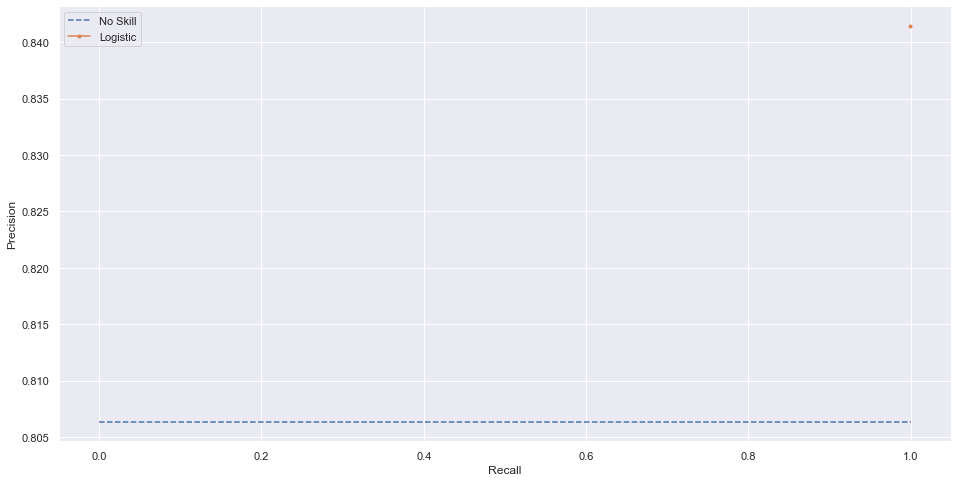

In [15]:
from matplotlib import pyplot 
# plot the precision-recall curves

no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(Recall, Precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost 

In [16]:
!pip3 install xgboost
from xgboost import XGBClassifier

In [17]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train,Y_train) 

xgb_model.predict(X_test)
score = xgb_model.score(X_test, Y_test)
print(score)

0.8622129436325678


In [18]:
#точність класифікатора XGBoost на тестовому наборі:
print('Accuracy of XGBoost classifier on test set:\
{:.2f}'.format(xgb_model.score(X_test, Y_test)))
print('Precision of XGBoost classifier on test set: \
{:.2f}'.format(metrics.precision_score(Y_test, xgb_model.predict(X_test))))
print('Recall of XGBoost classifier on test set: \
{:.2f}'.format(metrics.recall_score(Y_test, xgb_model.predict(X_test))))

Accuracy of XGBoost classifier on test set:0.86
Precision of XGBoost classifier on test set: 0.85
Recall of XGBoost classifier on test set: 1.00


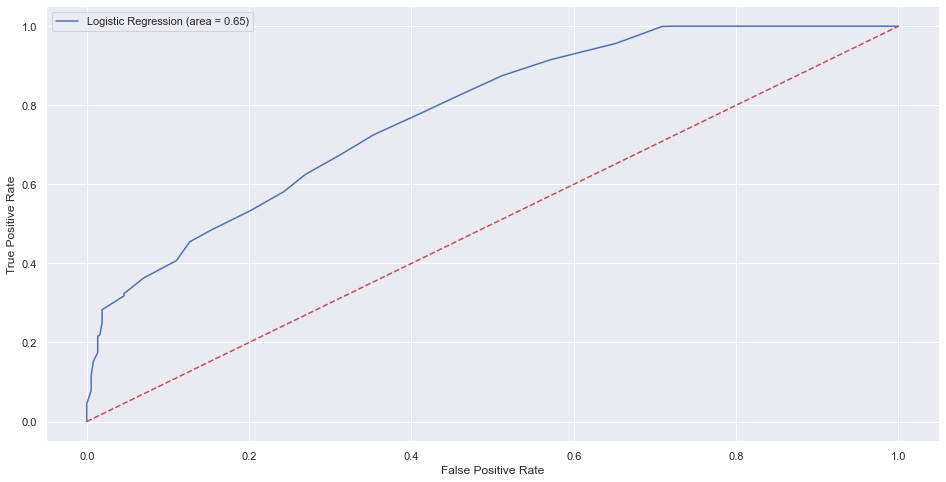

In [19]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
import pylab

auc = roc_auc_score(Y_test, xgb_model.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:,1])

pylab.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
pylab.plot([0, 1], [0, 1],'r--')
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.legend(loc=0)
pylab.show()

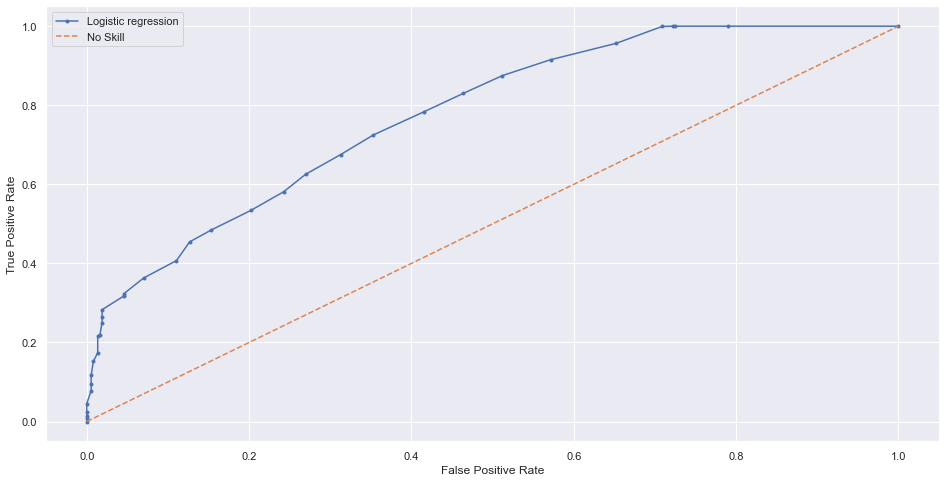

In [20]:
from matplotlib import pyplot
# calculate roc curves
auc = roc_auc_score(Y_test, xgb_model.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:,1])

pyplot.plot(fpr, tpr, marker='.', label='Logistic regression')
pyplot.plot([0, 1], [0, 1] , linestyle='--', label='No Skill')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()